In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import os
from scipy.interpolate import interp1d
%matplotlib inline

In [2]:
files = [i for i in os.listdir() if '.txt' in i] 

In [3]:
len(files)//101

8

In [4]:
settings = [5.0, 10.0, 25.0, 50.0, 75.0, 100.0, 150.0, 200.0]
means = []
datas = []
for setting in settings:
    files_per_setting = [file for file in files if file.split('output')[1].startswith(str(setting))]
    file = [i for i in files_per_setting if i.endswith('101.txt')][0]
    data_setting = {}
    with open(file) as f:
        data = {i.split(':')[0].strip():i.split(':')[1].strip() for i in f.read().split('\n') if '==' not in i and len(i) > 0}
    for key in data:
        if key in data_setting:
            data_setting[key].extend([float(i) for i in data[key].split(',') if len(i) > 0])
        else:
            data_setting[key] = [float(i) for i in data[key].split(',') if len(i) > 0]
    means.append({key:sum(data_setting[key]) / len(data_setting[key]) for key in data_setting})
    datas.append(data_setting)

In [5]:
df = pd.DataFrame.from_records(means)
df['Epsilon'] = settings

Text(0.5, 1.0, 'Number of traces in log')

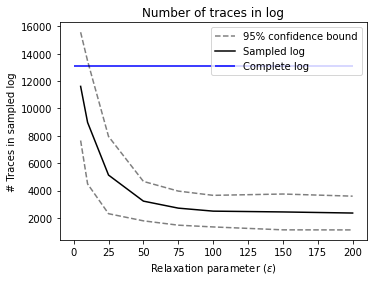

In [6]:
fig, ax = plt.subplots(figsize=[5.5,4])

toplot = 'Traces Left'
upper = [np.mean(d[toplot]) + 1.96 * np.std(d[toplot]) for d in datas]
ax.plot(sorted(settings), upper, color='black', linestyle='dashed', alpha=0.5, label='95% confidence bound')

lower = [np.mean(d[toplot]) - 1.96 * np.std(d[toplot]) for d in datas]
ax.plot(sorted(settings), lower, color='black', linestyle='dashed', alpha=0.5)

ax.plot(df['Epsilon'], df[toplot], color='black', label='Sampled log')
ax.hlines(y=df['Total Traces'][0], xmin=0, xmax=200, color='blue', label='Complete log')

ax.set_xlabel('Relaxation parameter ($\epsilon$)')
ax.set_ylabel('# Traces in sampled log')
ax.legend()
ax.set_title('Number of traces in log')

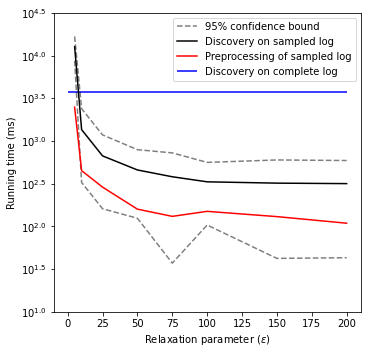

In [13]:
fig, ax = plt.subplots(figsize=[5.5,5.5])

ax.hlines(y=np.log10(df['Baseline time'].mean()), xmin=0, xmax=200, color='blue', label='Discovery on complete log')

toplot = 'TotalTime'
upper = [np.mean(d[toplot]) + 1.96 * np.std(d[toplot]) for d in datas]
ax.plot(sorted(settings), np.log10(upper), color='black', linestyle='dashed', alpha=0.5, label='95% confidence bound')

lower = [np.mean(d[toplot]) - 1.96 * np.std(d[toplot]) for d in datas]
ax.plot(sorted(settings), np.log10(lower), color='black', linestyle='dashed', alpha=0.5)

ax.plot(df['Epsilon'], np.log10(df[toplot]), color='black', label='Discovery on sampled log')

ax.plot(df['Epsilon'], np.log10(df['preProcessingTime']), color='red', label='Preprocessing of sampled log')


ticks, labels = plt.yticks()
plt.yticks(ticks, ['$10^{'+ str(i) + '}$' for i in ticks]);
ax.legend()
ax.set_ylabel('Running time (ms)')
ax.set_xlabel('Relaxation parameter ($\epsilon$)');

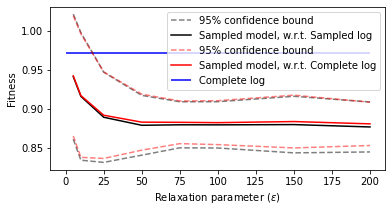

In [8]:
fig, ax = plt.subplots(figsize=[6,3])

toplot = 'Recall Paper'
upper = [np.mean(d[toplot]) + 1.96 * np.std(d[toplot]) for d in datas]
ax.plot(sorted(settings), upper, color='black', linestyle='dashed', alpha=0.5, label='95% confidence bound')

lower = [np.mean(d[toplot]) - 1.96 * np.std(d[toplot]) for d in datas]
ax.plot(sorted(settings), lower, color='black', linestyle='dashed', alpha=0.5)
ax.plot(df['Epsilon'], df[toplot], color='black', label='Sampled model, w.r.t. Sampled log')

toplot = 'Recall'
upper = [np.mean(d[toplot]) + 1.96 * np.std(d[toplot]) for d in datas]
ax.plot(sorted(settings), upper, color='red', linestyle='dashed', alpha=0.5, label='95% confidence bound')

lower = [np.mean(d[toplot]) - 1.96 * np.std(d[toplot]) for d in datas]
ax.plot(sorted(settings), lower, color='red', linestyle='dashed', alpha=0.5)
ax.plot(df['Epsilon'], df[toplot], color='red', label='Sampled model, w.r.t. Complete log')

ax.hlines(y=df['Baseline Recall'][0], xmin=0, xmax=200, color='blue', label='Complete log')

ax.set_xlabel('Relaxation parameter ($\epsilon$)')
ax.set_ylabel('Fitness')
ax.legend()

Text(0.5, 1.0, 'Precision')

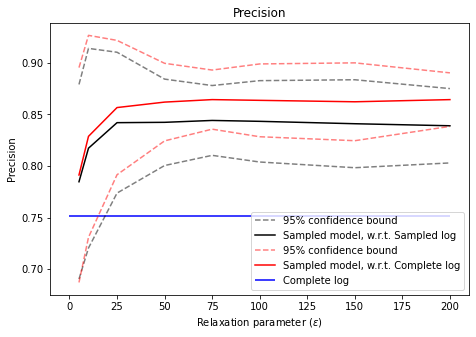

In [53]:
fig, ax = plt.subplots(figsize=[7.5,5])

toplot = 'Precision Paper'
upper = [np.mean(d[toplot]) + 1.96 * np.std(d[toplot]) for d in datas]
ax.plot(sorted(settings), upper, color='black', linestyle='dashed', alpha=0.5, label='95% confidence bound')

lower = [np.mean(d[toplot]) - 1.96 * np.std(d[toplot]) for d in datas]
ax.plot(sorted(settings), lower, color='black', linestyle='dashed', alpha=0.5)
ax.plot(df['Epsilon'], df[toplot], color='black', label='Sampled model, w.r.t. Sampled log')

toplot = 'Precision'
upper = [np.mean(d[toplot]) + 1.96 * np.std(d[toplot]) for d in datas]
ax.plot(sorted(settings), upper, color='red', linestyle='dashed', alpha=0.5, label='95% confidence bound')

lower = [np.mean(d[toplot]) - 1.96 * np.std(d[toplot]) for d in datas]
ax.plot(sorted(settings), lower, color='red', linestyle='dashed', alpha=0.5)
ax.plot(df['Epsilon'], df[toplot], color='red', label='Sampled model, w.r.t. Complete log')

ax.hlines(y=df['Baseline Precison'][0], xmin=0, xmax=200, color='blue', label='Complete log')

ax.set_xlabel('Relaxation parameter ($\epsilon$)')
ax.set_ylabel('Precision')
ax.legend()
ax.set_title('Precision')

In [10]:
df['F'] = 2*((df['Precision']*df['Recall'])/(df['Precision']+df['Recall']))
df['F p'] = 2*((df['Precision Paper']*df['Recall Paper'])/(df['Precision Paper']+df['Recall Paper']))
df['F basline'] = 2*((df['Baseline Precison']*df['Baseline Recall'])/(df['Baseline Precison']+df['Baseline Recall']))

Text(0.5, 1.0, '$F_1$ score')

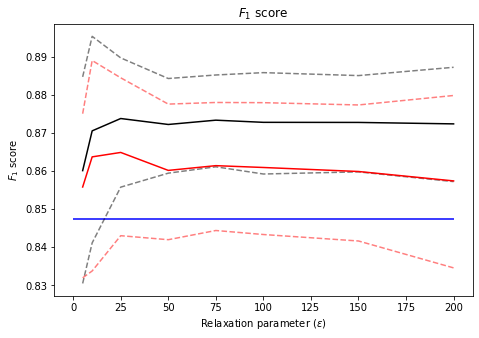

In [12]:
F = np.array([2*((np.array(k['Precision'])*np.array(k['Recall']))/(np.array(k['Precision'])+np.array(k['Recall']))) for k in datas])
Fp = np.array([2*((np.array(k['Precision Paper'])*np.array(k['Recall Paper']))/(np.array(k['Precision Paper'])+np.array(k['Recall Paper']))) for k in datas])

fig, ax = plt.subplots(figsize=[7.5,5])

toplot = 'F'
upper = [np.mean(d) + 1.96 * np.std(d) for d in F]
ax.plot(sorted(settings), upper, color='black', linestyle='dashed', alpha=0.5, label='95% confidence bound')

lower = [np.mean(d) - 1.96 * np.std(d) for d in F]
ax.plot(sorted(settings), lower, color='black', linestyle='dashed', alpha=0.5)
ax.plot(df['Epsilon'], df[toplot], color='black', label='Sampled model, w.r.t. Sampled log')

toplot = 'F p'
upper = [np.mean(d) + 1.96 * np.std(d) for d in Fp]
ax.plot(sorted(settings), upper, color='red', linestyle='dashed', alpha=0.5, label='95% confidence bound')

lower = [np.mean(d) - 1.96 * np.std(d) for d in Fp]
ax.plot(sorted(settings), lower, color='red', linestyle='dashed', alpha=0.5)
ax.plot(df['Epsilon'], df[toplot], color='red', label='Sampled model, w.r.t. Complete log')


ax.hlines(y=df['F basline'][0], xmin=0, xmax=200, color='blue', label='Complete log')

ax.set_xlabel('Relaxation parameter ($\epsilon$)')
ax.set_ylabel('$F_1$ score')
ax.set_title('$F_1$ score')